# <u>**Introduction**</u>




## Problem Statement

Healthcare fraud is a growing concern worldwide, leading to significant financial losses for both public and private healthcare providers, as well as compromising patient care. Detecting healthcare fraud is a complex task due to the evolving tactics used by fraudsters. The problem is to develop an effective healthcare fraud detection system using Supervised Learning model that can identify fraudulent activities within healthcare claims and transactions.
 
 

## Objectives
1. **Fraud Detection:**
 - create a robust system that can detect various types of fraudulent activities in healthcare claims, billing, or transactions. 
 
 2. **Improving Accuracy:**
 - Implementing linear regression machine learning models, and algorithms to improve the accuracy of fraud detection.



# <u>**Data Gathering and Preparation**</u>


## Sources of Data
https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/data

## Data wrangling steps

**1. Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Steps needed before do permutation importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

**2. Read in the dataset**

In [2]:
# read in the orders dataset
Fraud= pd.read_csv('DATASET/Train-1542865627584.csv')
Beneficiary= pd.read_csv('DATASET/Train_Beneficiarydata-1542865627584.csv')
Inpatient= pd.read_csv('DATASET/Train_Inpatientdata-1542865627584.csv')
Outpatient= pd.read_csv('DATASET/Train_Outpatientdata-1542865627584.csv')

In [3]:
print(Fraud.shape)
Fraud.head()

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


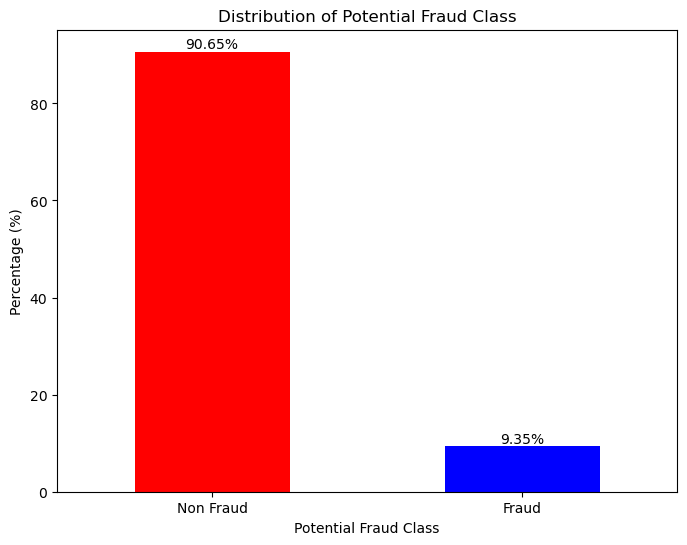

In [4]:
count_classes = pd.value_counts(Fraud['PotentialFraud'], sort=True)
label = ["Non Fraud", "Fraud"]

# Calculate percentages
percent_distribution = count_classes * 100 / len(Fraud)

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = percent_distribution.plot(kind='bar', color=['red', 'blue'])
plt.title("Distribution of Potential Fraud Class")
plt.xlabel("Potential Fraud Class")
plt.ylabel("Percentage (%)")
plt.xticks(range(len(label)), label,rotation=0)

# Add labels to the bars
for i, percent in enumerate(percent_distribution):
    plt.annotate(f'{percent:.2f}%', (i, percent), ha='center', va='bottom')

plt.savefig("Potential Fraud Distribution.png")

plt.show()

The initial EDA focuses on the distribution of the potential fraud class within the dataset. A bar plot is utilized to illustrate the class distribution. It clearly demonstrates a significant class imbalance in the fraud detection data. Approximately 90.65% of the data is labeled as 'Non-Fraud,' while the 'Fraud' class comprises a smaller portion, approximately 9.35% of the dataset. This class imbalance is a critical observation as it may lead to a bias toward the majority class, rendering the detection of the fraud class less effective. Therefore, a suitable model technique to address this imbalance is linear regression, which is commonly used for binary classification with imbalanced data.

In [5]:
Beneficiary.shape

(138556, 25)

**3. Identify Missing Data**

In [6]:
Beneficiary.isnull().sum() 

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

**4. Understanding missing data**

In [7]:
# create a new DataFrame to store the information about nulls
null_df = pd.DataFrame(Beneficiary.isnull().sum(), columns=['Count of Nulls']) 

 
#null_df.index.name = "Column"
null_df.sort_values(['Count of Nulls'], ascending=False)

,Count of Nulls
DOD,137135
BeneID,0
ChronicCond_Cancer,0
OPAnnualReimbursementAmt,0
IPAnnualDeductibleAmt,0
IPAnnualReimbursementAmt,0
ChronicCond_stroke,0
ChronicCond_rheumatoidarthritis,0
ChronicCond_Osteoporasis,0
ChronicCond_IschemicHeart,0


# <u>**Exploratory Data Analysis (EDA)**</u>


## Basic descriptive statistics and visualizations

**1. Beneficiary Information Analysis**

In [8]:
def calculate_percentage(df, column_name):
    count_df = df[column_name].value_counts().reset_index()
    count_df.columns = [column_name, 'Count']
    count_df['Percentage'] = round((count_df['Count'] / count_df['Count'].sum()) * 100, 2)
    return count_df

# Calculate gender percentages
gender_percentage = calculate_percentage(Beneficiary, 'Gender')
print("Gender Percentage:")
print(gender_percentage)

# Calculate race percentages
race_percentage = calculate_percentage(Beneficiary, 'Race')
print("\nRace Percentage:")
print(race_percentage)


Gender Percentage:
   Gender  Count  Percentage
0       2  79106       57.09
1       1  59450       42.91

Race Percentage:
   Race   Count  Percentage
0     1  117057       84.48
1     2   13538        9.77
2     3    5059        3.65
3     5    2902        2.09


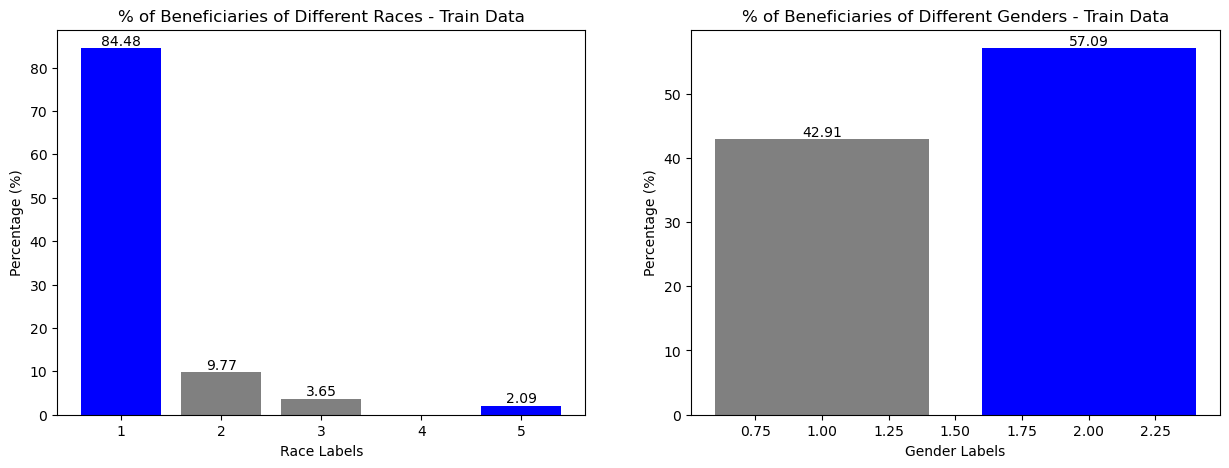

In [9]:
# Plot the bar chart
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
bars = ax1.bar(race_percentage['Race'], race_percentage['Percentage'],color=('b','gray','gray'))
ax1.set_title('% of Beneficiaries of Different Races - Train Data')
ax1.bar_label(bars)
ax1.set_xlabel('Race Labels')
ax1.set_ylabel('Percentage (%)')

bars = ax2.bar(gender_percentage['Gender'], gender_percentage['Percentage'],color=('b','gray','gray'))
ax2.set_title('% of Beneficiaries of Different Genders - Train Data')
ax2.bar_label(bars)
ax2.set_xlabel('Gender Labels')
ax2.set_ylabel('Percentage (%)')

plt.savefig("DATA ANALYSIS - RACE & GENDER.png")

plt.show()

Bar plot above provide insights into the distribution of beneficiaries in terms of gender and race. It helps to understand the diversity within dataset, making it easier to identify any imbalances or patterns related to these demographic attributes.

**2. Top 10 Beneficiaries**

I also studied the top beneficiaries that paid the highest deductible and for whom the highest total reimbursements were received. There are several beneficiaries that are common in both groups as we can see from the two graphs below.

In [10]:
Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

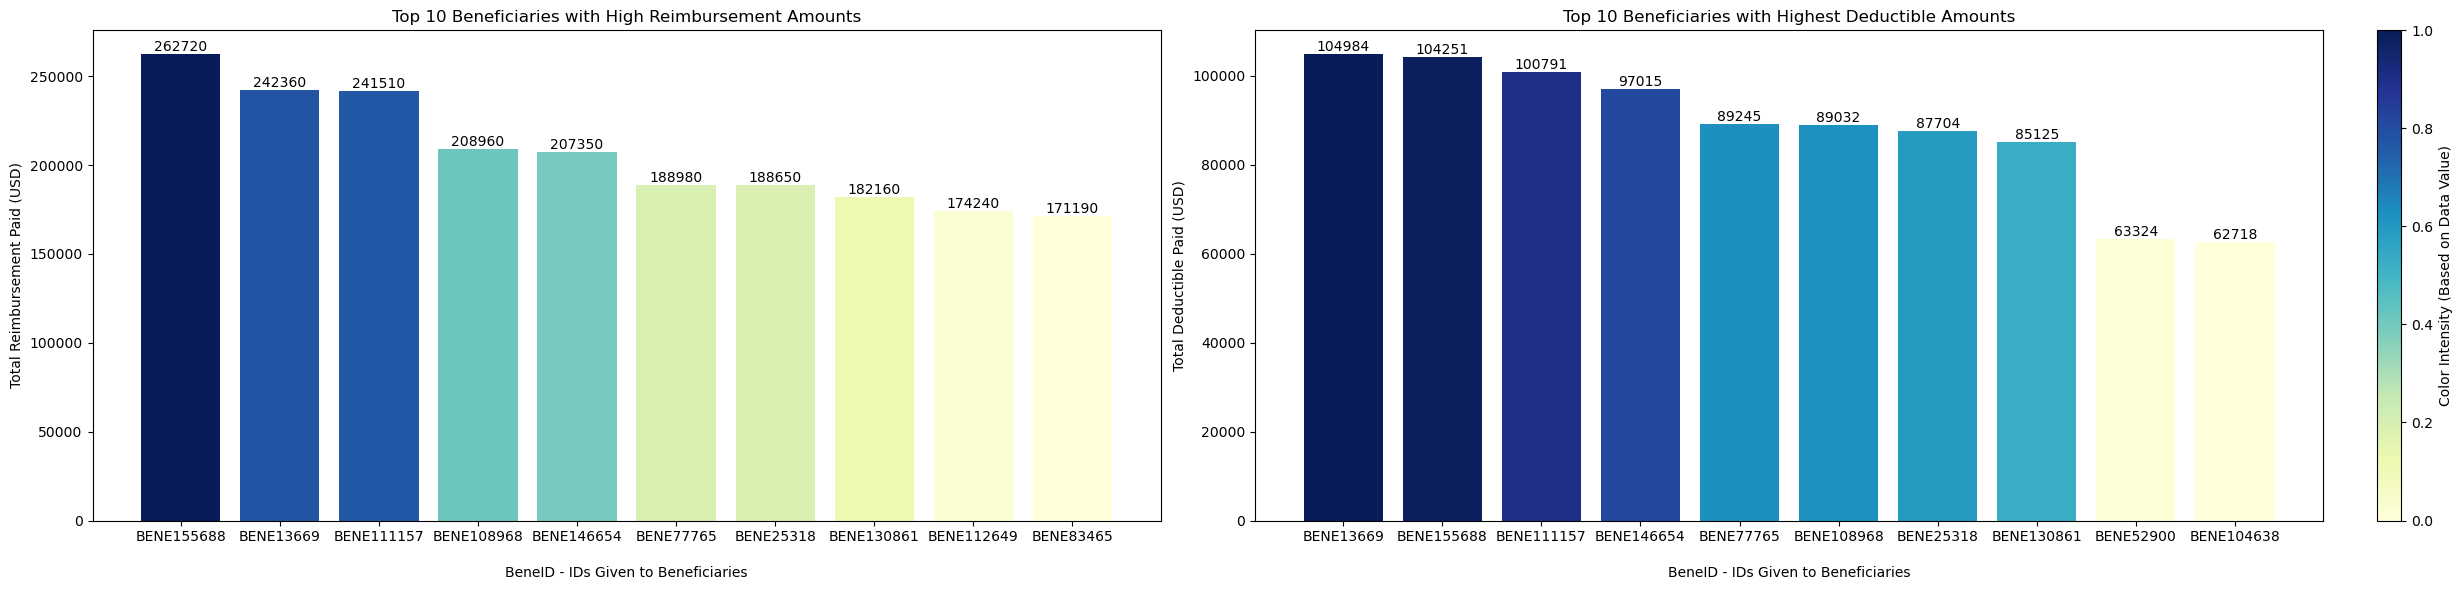

In [11]:
# Calculate the total annual reimbursement amount
Beneficiary['TotalAnnualReimbursementAmt'] = Beneficiary['IPAnnualReimbursementAmt'] + Beneficiary['OPAnnualReimbursementAmt']
Beneficiary['TotalAnnualDeductibleAmt'] = Beneficiary['IPAnnualDeductibleAmt'] + Beneficiary['OPAnnualDeductibleAmt']+Beneficiary['OPAnnualReimbursementAmt']

# Sort the DataFrame by 'TotalAnnualReimbursementAmt' and 'TotalAnnualDeductibleAmt' in descending order
Beneficiary = Beneficiary.sort_values(by='TotalAnnualReimbursementAmt', ascending=False)
Beneficiary_deduct = Beneficiary.sort_values(by='TotalAnnualDeductibleAmt', ascending=False)

# Select the top 10 beneficiaries
top_10_beneficiaries = Beneficiary.nlargest(10, 'TotalAnnualReimbursementAmt')
top_10_deductible = Beneficiary_deduct.nlargest(10, 'TotalAnnualDeductibleAmt')

# Create a figure with two subplots (one for reimbursement and one for deductible)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(28, 6))

# Create a gradient color map for the bars
cmap = plt.get_cmap('YlGnBu')

# Define a normalization function for data values
def normalize_values(Beneficiary_column):
    return (Beneficiary_column - Beneficiary_column.min()) / (Beneficiary_column.max() - Beneficiary_column.min())


# Plot the top 10 beneficiaries with high reimbursement amounts
bars1 = ax1.bar(top_10_beneficiaries['BeneID'], top_10_beneficiaries['TotalAnnualReimbursementAmt'], color=cmap(normalize_values(top_10_beneficiaries['TotalAnnualReimbursementAmt'])))
ax1.set_title('Top 10 Beneficiaries with High Reimbursement Amounts')
ax1.bar_label(bars1)
ax1.set_xlabel('\nBeneID - IDs Given to Beneficiaries')
ax1.set_ylabel('Total Reimbursement Paid (USD)')

# Plot the top 10 beneficiaries with high deductible amounts
bars2 = ax2.bar(top_10_deductible['BeneID'], top_10_deductible['TotalAnnualDeductibleAmt'],color=cmap(normalize_values(top_10_deductible['TotalAnnualDeductibleAmt'])))
ax2.set_title('Top 10 Beneficiaries with Highest Deductible Amounts')
ax2.bar_label(bars2)
ax2.set_xlabel('\nBeneID - IDs Given to Beneficiaries')
ax2.set_ylabel('\nTotal Deductible Paid (USD)')

# Adjust the layout to avoid overlap of x-axis labels
plt.tight_layout()

# Create a color bar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, 1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=(ax1, ax2), orientation='vertical', pad=0.02)
cbar.set_label('Color Intensity (Based on Data Value)')

plt.savefig("TOP 10 REIMBURSEMENT & DEDUCT.png")

plt.show()


The second EDA involves examining discrepancies between deductible and reimbursement amounts, which could potentially indicate fraud. For instance, take the case of 'BENE155688,' where the reimbursement amount is 262,720 USD, significantly higher than the deductible of $104,251. This substantial imbalance raises concerns and warrants further investigation as a potential red flag for fraudulent activity. In this scenario, a suitable model for addressing such cases would be supervised learning for classification. The primary objective is to classify instances as fraud or non-fraud, and accuracy serves as a key metric for assessment. While linear regression is a valuable tool for prediction, it is not appropriate for classifying fraud and non-fraud cases in this context.

**3. Fraud vs Non-Fraud Providers Study:**

*a. Maximum Reimbursement Amounts*

In [12]:
# Inpatient Providers
MaxIn = Fraud.merge(Inpatient, on='Provider', how='inner')

# Outpatient Providers
MaxOut = Fraud.merge(Outpatient, on='Provider', how='inner')

In [13]:
#Maximum Reimbursement : Inpatient

MaxIn['InscClaimAmtReimbursed'] = pd.to_numeric(MaxIn['InscClaimAmtReimbursed'], errors='coerce')

# Group the data by 'Provider' and 'PotentialFraud', and select the maximum 'InscClaimAmtReimbursed' value within each group
grouped_data = MaxIn.groupby(['Provider', 'PotentialFraud'])['InscClaimAmtReimbursed'].max().reset_index()

# Display the result
grouped_data[['Provider', 'PotentialFraud', 'InscClaimAmtReimbursed']]


#Maximum Reimbursement : Outpatient
MaxOut['InscClaimAmtReimbursed'] = pd.to_numeric(MaxOut['InscClaimAmtReimbursed'], errors='coerce')

# Group the data by 'Provider' and 'PotentialFraud', and select the maximum 'InscClaimAmtReimbursed' value within each group
groupedOut_data = MaxOut.groupby(['Provider', 'PotentialFraud'])['InscClaimAmtReimbursed'].max().reset_index()

# Display the result
groupedOut_data[['Provider', 'PotentialFraud', 'InscClaimAmtReimbursed']]

,Provider,PotentialFraud,InscClaimAmtReimbursed
0,PRV51001,No,1500
1,PRV51003,Yes,3300
2,PRV51004,No,3300
3,PRV51005,Yes,4080
4,PRV51007,No,3300
...,...,...,...
5007,PRV57759,No,3300
5008,PRV57760,No,1100
5009,PRV57761,No,2200
5010,PRV57762,No,1900


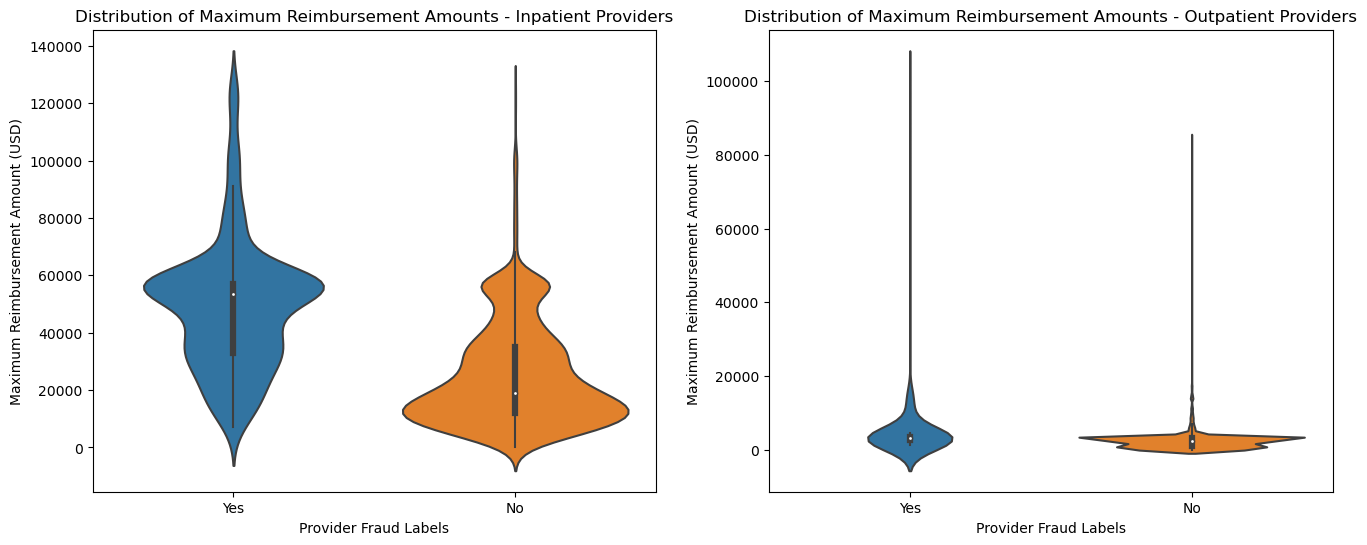

In [14]:
# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the violinplot for Inpatient Providers
sns.violinplot(ax=axes[0], x='PotentialFraud', y='InscClaimAmtReimbursed', data=grouped_data, order=['Yes','No'])
axes[0].set_title('Distribution of Maximum Reimbursement Amounts - Inpatient Providers')
axes[0].set_xlabel('Provider Fraud Labels')
axes[0].set_ylabel('Maximum Reimbursement Amount (USD)')

# Plot the violinplot for Outpatient Providers
sns.violinplot(ax=axes[1], x='PotentialFraud', y='InscClaimAmtReimbursed', data=groupedOut_data, order=['Yes','No'])
axes[1].set_title('Distribution of Maximum Reimbursement Amounts - Outpatient Providers')
axes[1].set_xlabel('Provider Fraud Labels')
axes[1].set_ylabel('Maximum Reimbursement Amount (USD)')

# Adjust layout
#plt.tight_layout()

# Show the combined plot
plt.show()

Inpatient Providers: In the top inpatient providers with high maximum reimbursement amounts, almost all of them are labeled as potential fraud. This could indicate a potential issue with high reimbursements among these providers, which warrants further investigation.

Outpatient Providers: Among the top outpatient providers with high maximum reimbursement amounts, there is a more balanced division between potential fraud and non-fraud providers. However, it's notable that the highest reimbursements are claimed by potential fraud providers. This pattern may also raise concerns and should be investigated further.

These observations suggest that there may be irregularities in reimbursement patterns associated with potential fraud providers, particularly in the outpatient dataset.

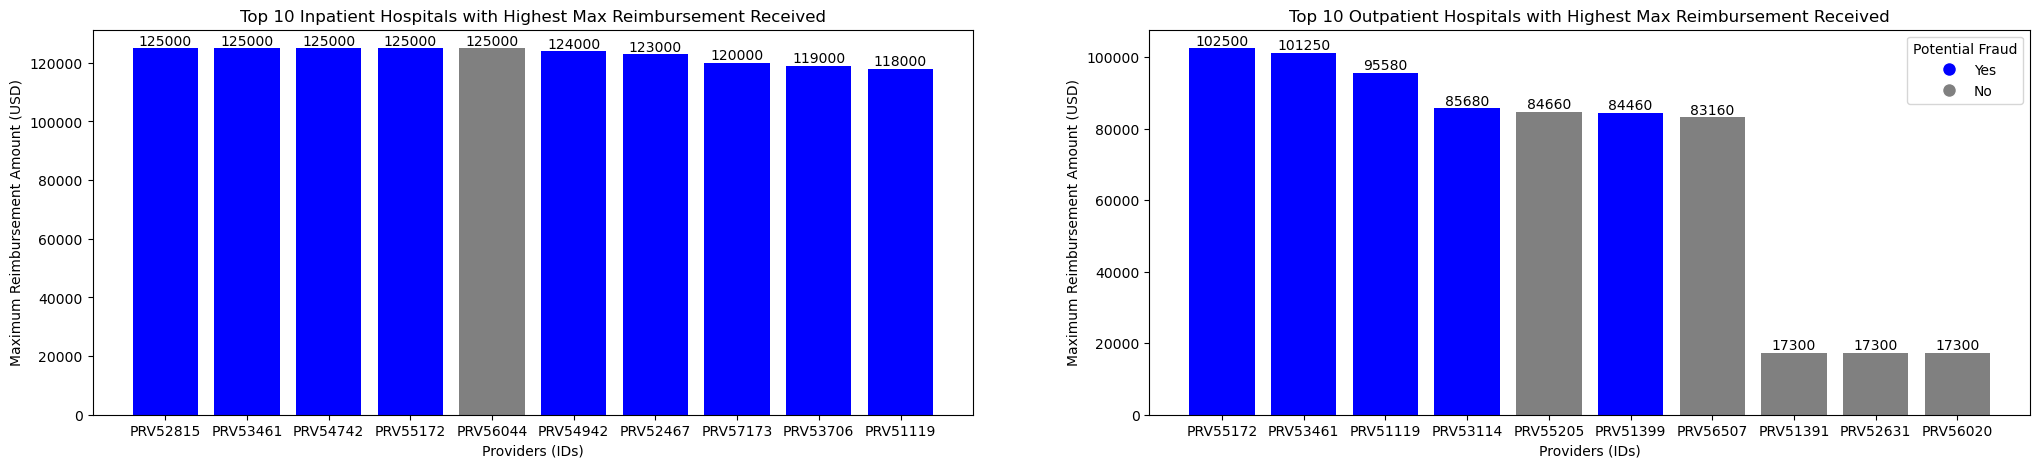

In [15]:
Inpatient = ((grouped_data["Provider"]),grouped_data["InscClaimAmtReimbursed"] )
top_10_Inpatient = grouped_data.nlargest(10,['InscClaimAmtReimbursed'])

Outpatient = ((groupedOut_data["Provider"]),groupedOut_data["InscClaimAmtReimbursed"])
top_10_Outpatient = groupedOut_data.nlargest(10,['InscClaimAmtReimbursed'])

# Plot the bar chart
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(25,5))
colors = {'Yes': 'b', 'No': 'gray'}
bars = ax1.bar(top_10_Inpatient['Provider'], top_10_Inpatient['InscClaimAmtReimbursed'],color=[colors[i] for i in top_10_Inpatient['PotentialFraud']])
ax1.set_title('Top 10 Inpatient Hospitals with Highest Max Reimbursement Received')
ax1.bar_label(bars)
ax1.set_xlabel('Providers (IDs)')
ax1.set_ylabel('Maximum Reimbursement Amount (USD)')

bars = ax2.bar(top_10_Outpatient['Provider'], top_10_Outpatient['InscClaimAmtReimbursed'],color=[colors[i] for i in top_10_Outpatient['PotentialFraud']])
ax2.set_title('Top 10 Outpatient Hospitals with Highest Max Reimbursement Received')
ax2.bar_label(bars)
ax2.set_xlabel('Providers (IDs)')
ax2.set_ylabel('Maximum Reimbursement Amount (USD)')


# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Yes', markersize=10, markerfacecolor='b'),
                 plt.Line2D([0], [0], marker='o', color='w', label='No', markersize=10, markerfacecolor='grey')]
plt.legend(handles=legend_labels, title='Potential Fraud')

plt.savefig("TOP 10 REIMBURSEMENT.png")

plt.show()

**Inpatient Providers:**
- In the top 10 inpatient providers with the highest maximum reimbursement amounts, 9 out of the 10 providers are labeled as potential fraud. This indicates a high concentration of potential fraud among the providers with the highest inpatient reimbursements. The exception is PRV56044, which is not labeled as potential fraud.

**Outpatient Providers:**
- In the case of outpatient providers with high maximum reimbursement amounts, there is a more balanced distribution between potential fraud and non-fraud providers. This means that, among the top outpatient providers, both potential fraud and non-fraud providers have high maximum reimbursement amounts. While there is a mix of potential fraud and non-fraud cases, it's still noteworthy that the highest reimbursements are often associated with potential fraud providers.

These findings highlight the potential concentration of fraudulent activity among inpatient providers with exceptionally high reimbursement amounts. The outpatient providers exhibit a more even distribution, but the fact that the highest reimbursements are primarily claimed by potential fraud providers is a notable pattern that also calls for closer study.

*b. Number of Claims*

In [16]:
MaxIn.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,7840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRV51001,No,BENE102690,CLM49733,2009-05-04,2009-05-18,42000,PHY383193,PHY378091,PHY389113,...,2720,45829,53081,NaN,3521.0,2724.0,NaN,NaN,NaN,NaN
4,PRV51001,No,BENE152088,CLM37205,2009-02-06,2009-02-06,4000,PHY402229,PHY329739,NaN,...,NaN,NaN,NaN,NaN,8659.0,NaN,NaN,NaN,NaN,NaN


In [17]:
# List of column names to keep
columns_to_keep = ['Provider', 'PotentialFraud','ClaimID']

# Delete all columns except the specified ones
MaxIn = MaxIn[columns_to_keep]
MaxOut= MaxOut[columns_to_keep]

In [18]:
MaxIn.isnull().sum()

Provider          0
PotentialFraud    0
ClaimID           0
dtype: int64

In [19]:
MaxOut.isnull().sum()

Provider          0
PotentialFraud    0
ClaimID           0
dtype: int64

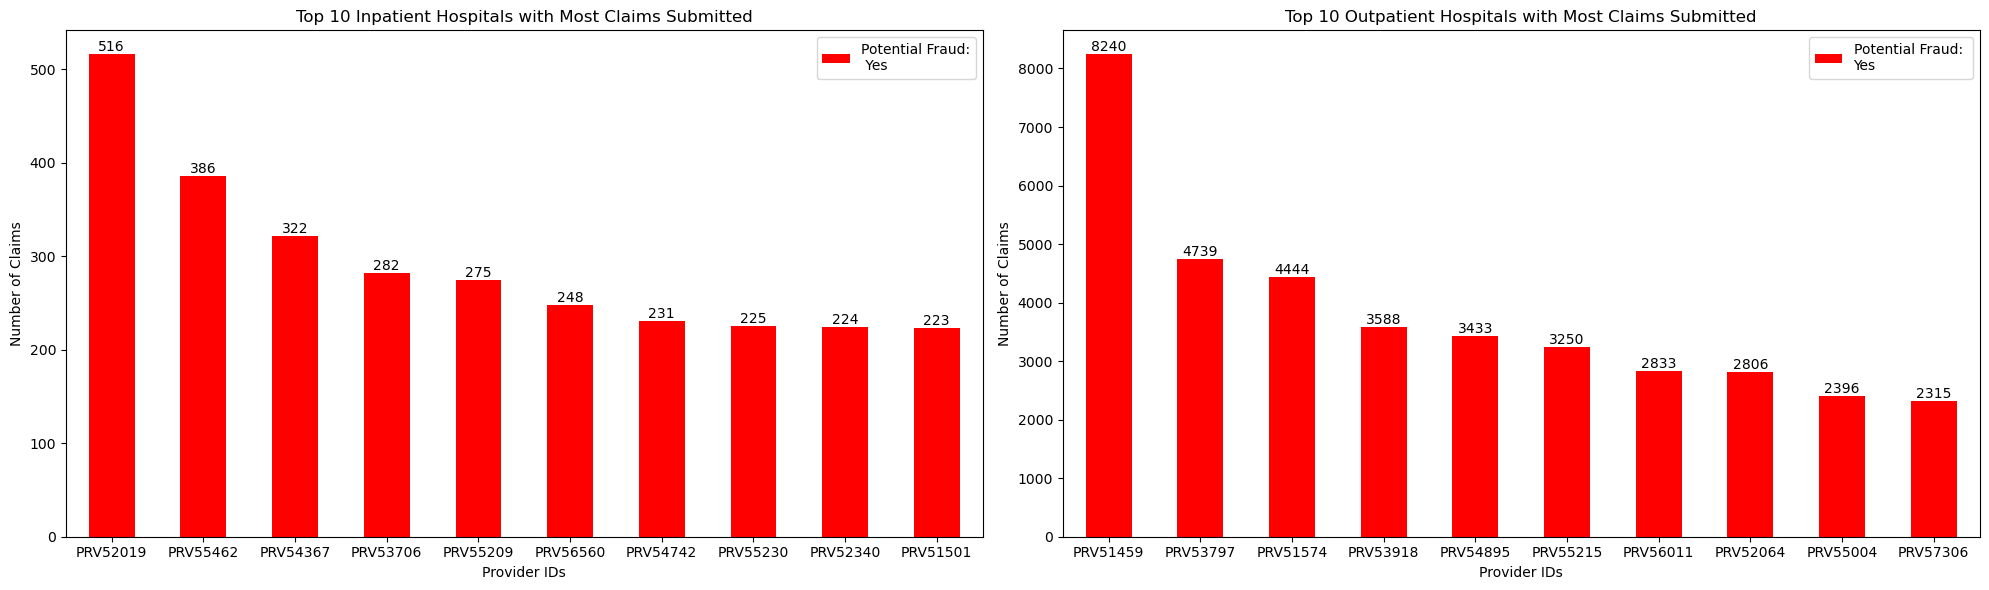

In [20]:
# Filter rows with PotentialFraud labeled as 'Yes' for Inpatient and Outpatient separately
fraud_MaxIn = MaxIn[MaxIn['PotentialFraud'] == 'Yes']
fraud_MaxOut = MaxOut[MaxOut['PotentialFraud'] == 'Yes']

# Group data by 'Provider' and count the number of claims 
provider_claim_counts = fraud_MaxIn['Provider'].value_counts().head(10)
provider_claim_counts_Out = fraud_MaxOut['Provider'].value_counts().head(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Create a bar plot for the top 10 inpatient providers with the most claims
bars1 = provider_claim_counts.plot(kind='bar', ax=ax1, color='red')
ax1.set_title('Top 10 Inpatient Hospitals with Most Claims Submitted')
ax1.set_xlabel('Provider IDs')
ax1.set_ylabel('Number of Claims')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)  # Set x-axis labels rotation to 0
ax1.legend(['Potential Fraud:\n Yes'], loc='upper right')  # Add legend for 'Yes' Potential Fraud

# Annotate the data values on the bars
for i, v in enumerate(provider_claim_counts):
    ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# Create a bar plot for the top 10 outpatient providers with the most claims
bars2 = provider_claim_counts_Out.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Top 10 Outpatient Hospitals with Most Claims Submitted')
ax2.set_xlabel('Provider IDs')
ax2.set_ylabel('Number of Claims')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)  # Set x-axis labels rotation to 0
ax2.legend(['Potential Fraud: \nYes'], loc='upper right')  # Add legend for 'Yes' Potential Fraud

# Annotate the data values on the bars
for i, v in enumerate(provider_claim_counts_Out):
    ax2.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.savefig("TOP 10 MOST CLAIM.png")

plt.show()

The plot provides a clear comparison of the top 10 inpatient and outpatient providers with the most claims submitted, specifically those labeled as potential fraud.

The plot demonstrates that outpatient providers have a notably higher number of potential fraud cases with the most claims submitted. The highest number of claims submitted among outpatient providers is associated with PRV51459, totaling 8,240 claims.

In contrast, the number of potential fraud cases with the most claims submitted is considerably lower among inpatient providers. The provider with the highest number of claims submitted in the inpatient category is PRV52019, with 516 claims submitted.

These findings indicate that outpatient providers, in this dataset, have a higher prevalence of potential fraud cases with a larger volume of claims submitted when compared to inpatient providers

# <u>**Modeling**</u>



In [21]:
# read in the orders dataset
Fraud= pd.read_csv('DATASET/Train-1542865627584.csv')
Beneficiary= pd.read_csv('DATASET/Train_Beneficiarydata-1542865627584.csv')
Inpatient= pd.read_csv('DATASET/Train_Inpatientdata-1542865627584.csv')
Outpatient= pd.read_csv('DATASET/Train_Outpatientdata-1542865627584.csv')

In [22]:
Beneficiary['WhetherDead']= 2
Beneficiary.loc[Beneficiary.DOD.notna(),'WhetherDead'] = 1
Beneficiary

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,2,1,1,36000,3204,60,70,2
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,0,0,30,50,2
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,1,2,2,2,0,0,90,40,2
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,1,2,0,0,1810,760,2
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,1,2,2,2,2,0,0,1790,1200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,0,0,430,460,2
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,1,2,2,2,2,0,0,880,100,2
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,2,2,2,2000,1068,3240,1390,2
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,1,2,2,2,0,0,2650,10,2


In [23]:
Fraud['NewPotentialFraud'] = Fraud['PotentialFraud'].map({'Yes': 1, 'No': 2})

# Drop the original 'PotentialFraud' column
Fraud.drop(columns=['PotentialFraud'], inplace=True)
Fraud

,Provider,NewPotentialFraud
0,PRV51001,2
1,PRV51003,1
2,PRV51004,2
3,PRV51005,1
4,PRV51007,2
...,...,...
5405,PRV57759,2
5406,PRV57760,2
5407,PRV57761,2
5408,PRV57762,2


In [24]:
#Combine Inpatient and Outpatient with Beneficiary

PtData = pd.merge(Inpatient, Outpatient, left_on = [ x for x in Outpatient.columns if x in Inpatient.columns], right_on = [ x for x in Outpatient.columns if x in Inpatient.columns], how = 'outer')
PtData = pd.merge(PtData, Beneficiary,left_on='BeneID',right_on='BeneID',how='inner')
PtData = pd.merge(PtData, Fraud,left_on='Provider',right_on='Provider',how='inner')
PtData.shape

(558211, 56)

In [25]:
PtData.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NewPotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,2,1,1,36000,3204,60,70,2,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,1,2,2,2,24000,2136,450,200,2,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,2,2,2,19000,1068,100,20,2,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,2,2,17000,1068,1050,540,2,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,2,27000,2136,450,160,2,1


In [26]:
import numpy as np
import pandas as pd

def len_check(PtData, l):
    Dictionary = {}
    for col in PtData.columns:
        not_null_values = PtData[col].dropna().unique()
        valid_values = [x for x in not_null_values if len(str(x)) < l or len(str(x)) > l]
        Dictionary[col] = valid_values

    print(Dictionary)

In [27]:
def count_unique_values(a):
    return np.array([len(set(filter(lambda x: x is not None, x))) for x in a.values])

# Convert 'PtData' to a DataFrame temporarily
PtData = pd.DataFrame(PtData)

# Create a new variable 'NumPhysicians' and drop the original physician columns
physician_columns = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']
PtData['NumPhysicians'] = count_unique_values(PtData[physician_columns])
PtData = PtData.drop(physician_columns, axis=1)

# Count the number of procedures 'NumProc' for each claim
ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1, 7)]
PtData['NumProc'] = PtData[ClmProcedure_vars].notnull().sum(axis=1)

# Define columns to keep
keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumProc'] + ClmProcedure_vars

# Check if 'NumProc' matches the count of unique values in 'ClmProcedure_vars'
proc_count = count_unique_values(PtData[ClmProcedure_vars])
PtData['NumProcMatches'] = PtData['NumProc'] == proc_count

# Filter DataFrame based on the condition
filtered_data = PtData[keep].loc[PtData['NumProcMatches']]

# Drop the 'ClmProcedure_vars' columns
PtData = PtData.drop(ClmProcedure_vars, axis=1)

In [28]:
# Count the number of claims 'NumClaims' for each beneficiary
ClmDiagnosisCode = ['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]
PtData['NumClaims'] = PtData[ClmDiagnosisCode].count(axis=1)

# Count the number of unique claims
PtData['NumUniqueClaims'] = PtData[ClmDiagnosisCode].nunique(axis=1)

# Check if 'NumClaims' matches the count of unique claims
PtData['ClaimsMatchUnique'] = PtData['NumClaims'] == PtData['NumUniqueClaims']

# Print rows where 'NumClaims' doesn't match unique claims
print(PtData.loc[PtData['ClaimsMatchUnique'] == False])

            BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
3        BENE21718   CLM72336   2009-10-17  2009-11-04  PRV55912   
7        BENE28966   CLM56700   2009-06-22  2009-06-25  PRV55912   
19       BENE50078   CLM46288   2009-04-09  2009-04-17  PRV55912   
25       BENE54995   CLM78587   2009-12-06  2009-12-18  PRV55912   
33       BENE70733   CLM38438   2009-02-14  2009-02-17  PRV55912   
...            ...        ...          ...         ...       ...   
558024   BENE98329  CLM721759   2009-12-09  2009-12-29  PRV57758   
558040   BENE89772  CLM148704   2009-01-20  2009-01-20  PRV54006   
558052  BENE109502  CLM316838   2009-04-21  2009-04-21  PRV56071   
558108  BENE108354  CLM591056   2009-09-21  2009-09-21  PRV51712   
558184  BENE140361  CLM309661   2009-04-17  2009-04-17  PRV52586   

        InscClaimAmtReimbursed AdmissionDt ClmAdmitDiagnosisCode  \
3                        17000  2009-10-17                 V5789   
7                        10000  2009-06-22     

Create a new variable "NumPhysicians" with number of physians(from 0 to 3): 'AttendingPhysician' not missing + 'OperatingPhysician' not missing + 'OtherPhysician' not missing

In [29]:
# Calculate the number of unique claims per beneficiary
PtData['NumUniqueClaims'] = PtData.groupby('BeneID')['ClaimID'].transform('nunique')

# Calculate ExtraClm (extra claims beyond unique claims)
PtData['ExtraClm'] = PtData['NumClaims'] - PtData['NumUniqueClaims']

# Convert date columns to datetime format
date_columns = ['AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD']
PtData[date_columns] = PtData[date_columns].apply(pd.to_datetime, format='%Y-%m-%d')

# Calculate AdmissionDays (number of days in hospital)
PtData['AdmissionDays'] = (PtData['DischargeDt'] - PtData['AdmissionDt']).dt.days + 1

# Calculate ClaimDays (number of days a claim spans)
PtData['ClaimDays'] = (PtData['ClaimEndDt'] - PtData['ClaimStartDt']).dt.days + 1

# Calculate Age
PtData['Age'] = ((PtData['ClaimStartDt'] - PtData['DOB']).dt.days + 1) / 365


In [30]:
# 'DiagnosisGroupCode' is not null, it assigns 1; otherwise, it assigns 0. 
# Drops the 'DiagnosisGroupCode' column to 'Hospt'


PtData['Hospt'] = (PtData['DiagnosisGroupCode'].notnull()).astype(int)
PtData.drop(['DiagnosisGroupCode'], axis=1, inplace=True)

In [31]:
# Check if there were any actions after death
date_columns = ['AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt']
PtData['DeadActions'] = PtData[date_columns].gt(PtData['DOD'], axis=0).any(axis=1).astype(int)

# Print rows with DeadActions > 0
print(PtData[PtData['DeadActions'] > 0])

# Drop columns if there are no actions after death date
if not PtData['DeadActions'].any():
    columns_to_drop = date_columns + ['DOD', 'DOB']
    PtData.drop(columns_to_drop, axis=1, inplace=True)

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AdmissionDt, ClmAdmitDiagnosisCode, DeductibleAmtPaid, DischargeDt, ClmDiagnosisCode_1, ClmDiagnosisCode_2, ClmDiagnosisCode_3, ClmDiagnosisCode_4, ClmDiagnosisCode_5, ClmDiagnosisCode_6, ClmDiagnosisCode_7, ClmDiagnosisCode_8, ClmDiagnosisCode_9, ClmDiagnosisCode_10, DOB, DOD, Gender, Race, RenalDiseaseIndicator, State, County, NoOfMonths_PartACov, NoOfMonths_PartBCov, ChronicCond_Alzheimer, ChronicCond_Heartfailure, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke, IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt, WhetherDead, NewPotentialFraud, NumPhysicians, NumProc, NumProcMatches, NumClaims, NumUniqueClaims, ClaimsMatchUnique, ExtraClm, AdmissionDays, ClaimD

In [32]:
PtData.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,NumPhysicians,NumProc,NumClaims,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Age,Hospt,DeadActions
count,558211.000000,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,40474.000000,558211.000000,558211.000000,558211.000000,558211.0
mean,997.012133,78.421085,1.578838,1.255011,25.446969,378.588195,11.931472,11.93877,1.598132,1.409573,...,2.214059,0.053557,3.272266,6.617216,-3.344950,6.665168,2.727940,73.350649,0.072507,0.0
std,3821.534891,274.016812,0.493746,0.717437,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,...,0.469850,0.280534,2.610513,4.092040,4.857765,5.638538,4.904984,13.026202,0.259325,0.0
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-29.000000,1.000000,1.000000,25.112329,0.000000,0.0
25%,40.000000,0.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.00000,1.000000,1.000000,...,2.000000,0.000000,1.000000,3.000000,-6.000000,3.000000,1.000000,67.591781,0.000000,0.0
50%,80.000000,0.000000,2.000000,1.000000,24.000000,350.000000,12.000000,12.00000,2.000000,1.000000,...,2.000000,0.000000,2.000000,6.000000,-3.000000,5.000000,1.000000,74.257534,0.000000,0.0
75%,300.000000,0.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.00000,2.000000,2.000000,...,2.000000,0.000000,4.000000,9.000000,0.000000,8.000000,1.000000,82.013699,0.000000,0.0
max,125000.000000,1068.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,...,3.000000,5.000000,11.000000,29.000000,10.000000,36.000000,37.000000,101.065753,1.000000,0.0


In [33]:
PtData.shape

(558211, 52)

In [34]:
PtData.isnull().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [35]:
## Fill missing results using 0
PtData = PtData.fillna(0).copy()
PtData

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,...,NumProcMatches,NumClaims,NumUniqueClaims,ClaimsMatchUnique,ExtraClm,AdmissionDays,ClaimDays,Age,Hospt,DeadActions
0,BENE11001,CLM46614,PRV55912,26000,7866,1068.0,1970,4019,5853,7843,...,False,10,3,True,7,7.0,7,66.326027,1,0
1,BENE16973,CLM565430,PRV55912,50,0,0.0,V7183,53081,78959,4280,...,False,9,3,True,6,0.0,1,77.405479,0,0
2,BENE17521,CLM34721,PRV55912,19000,45340,1068.0,4240,2639,2948,40390,...,False,10,2,True,8,13.0,13,95.205479,1,0
3,BENE21718,CLM72336,PRV55912,17000,V5789,1068.0,V5789,4168,73313,7812,...,False,10,4,False,6,19.0,19,87.106849,1,0
4,BENE22934,CLM73394,PRV55912,13000,71946,1068.0,71535,71960,4019,V1202,...,False,8,7,True,1,5.0,5,79.375342,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,PRV54050,500,0,0.0,71698,71941,7862,0,...,False,3,4,True,-1,0.0,3,84.476712,0,0
558207,BENE154687,CLM184358,PRV54302,3300,99639,0.0,99661,0,0,0,...,False,2,6,True,-4,0.0,1,81.835616,0,0
558208,BENE157378,CLM460770,PRV51577,2100,0,0.0,5854,7907,0,0,...,False,2,8,True,-6,0.0,21,63.150685,0,0
558209,BENE158295,CLM306999,PRV53083,10,0,0.0,42789,0,0,0,...,False,1,9,True,-8,0.0,1,84.767123,0,0


In [36]:
import pandas as pd

# Define the columns to aggregate
agg_columns = [
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
    'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
    'ChronicCond_stroke', 'WhetherDead', 'NumPhysicians', 
    'NumProc', 'NumUniqueClaims', 'ExtraClm', 'AdmissionDays',
    'ClaimDays', 'Hospt'
]

# Group by 'Provider' and perform aggregations
agg_dict = {col: 'sum' for col in agg_columns}
agg_dict.update({
    'BeneID': 'nunique', 'ClaimID': 'nunique',
    'NoOfMonths_PartACov': 'mean', 'NoOfMonths_PartBCov': 'mean',
    'IPAnnualReimbursementAmt': 'mean', 'IPAnnualDeductibleAmt': 'mean',
    'OPAnnualReimbursementAmt': 'mean', 'OPAnnualDeductibleAmt': 'mean', 'Age': 'mean'
})

# Group by 'Provider' and perform aggregations
df = PtData.groupby('Provider').agg(agg_dict).reset_index()

# Print the resulting DataFrame shape
print(df.shape)

(5410, 32)


In [37]:
# Merge df with Fraud, drop columns, and create df1 and df2
df1 = df.merge(Fraud, on='Provider', how='left').drop(['Provider', 'NewPotentialFraud'], axis=1)
df2 = df.merge(Fraud, on='Provider', how='left').drop(['Provider', 'NewPotentialFraud'], axis=1)

# Remove columns starting with 'ChronicCond' from df
columns_to_delete = [col for col in df.columns if col.startswith('ChronicCond')]
df = df.drop(columns=columns_to_delete)

# Remove 'RenalDiseaseIndicator' column from df
df.drop('RenalDiseaseIndicator', axis=1, inplace=True)

# Merge df with Fraud again and create the data DataFrame
data = df.merge(Fraud, on='Provider', how='left')

# Replace 'Yes' with 1 and 'No' with 2 in the 'NewPotentialFraud' column
data['NewPotentialFraud'] = data['NewPotentialFraud'].replace({'Yes': 1, 'No': 2})

# Drop 'Provider' column from the data DataFrame
data = data.drop(columns=['Provider'])

# Supervised Learning Model

Logistic Regression is a commonly used machine learning algorithm in fraud detection for several reasons:

1. Interpretability

 - It produces coefficients for each input feature, which can be interpreted as the impact of each feature on the likelihood of a fraudulent event occurring. This interpretability is essential in fraud detection, as it allows analysts to understand which features contribute to fraud risk.

2. Efficiency:
   
  - Logistic Regression is computationally efficient and can handle large datasets with relatively low computational resources. This is important when dealing with the vast amount of transaction data that fraud detection systems often process.

3. Low Risk of Overfitting: 

  - Logistic Regression typically has a lower risk of overfitting compared to more complex algorithms like decision trees or neural networks. Overfitting can be a concern when working with limited fraud data.

In [38]:
data

,InscClaimAmtReimbursed,DeductibleAmtPaid,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Hospt,BeneID,ClaimID,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,NewPotentialFraud
0,104640,5340.0,50,55,3,152,-61,30.0,61,5,24,25,12.000000,12.000000,17606.000000,897.120000,2615.200000,463.920000,78.265753,2
1,605670,66286.0,263,284,48,753,18,382.0,617,62,117,132,11.818182,11.871212,7568.181818,931.424242,2678.181818,737.121212,69.590162,1
2,52170,310.0,297,334,0,912,-499,0.0,362,0,138,149,11.865772,11.959732,4351.879195,434.953020,2194.899329,622.751678,71.790310,2
3,280910,3700.0,2326,2476,0,8449,-5181,0.0,2433,0,495,1165,11.907296,11.939914,3623.991416,379.162232,2109.733906,636.328755,70.077987,1
4,33710,3264.0,143,145,1,451,-219,19.0,141,3,58,72,11.833333,11.833333,3050.000000,445.000000,1729.722222,469.722222,68.840030,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,10640,130.0,56,55,0,127,-66,0.0,88,0,24,28,12.000000,12.000000,3962.142857,457.714286,3241.785714,886.785714,73.479159,2
5406,4770,0.0,44,41,0,174,-115,0.0,29,0,9,22,12.000000,11.727273,2785.454545,436.909091,1492.727273,805.454545,61.019178,2
5407,18470,370.0,163,170,0,620,-383,0.0,196,0,67,82,12.000000,12.000000,7026.585366,586.097561,2928.414634,707.317073,71.548045,2
5408,1900,0.0,2,2,0,5,-3,0.0,1,0,1,1,12.000000,12.000000,15000.000000,1068.000000,2540.000000,400.000000,67.789041,2


In [39]:
y=data.NewPotentialFraud.values #Target
x=data.drop(['NewPotentialFraud'], axis=1) #Input

In [40]:
#80(Train):20(Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [41]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Initialize models
models = {
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'KNN': KNeighborsClassifier()
         }

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train and evaluate each model with scaled features
accuracies = {}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = accuracy
    print(f'{name} Test Accuracy: {accuracy:.2f}%')

Logistic Regression Test Accuracy: 93.07%
Decision Tree Test Accuracy: 91.31%
Random Forest Test Accuracy: 93.07%
KNN Test Accuracy: 92.33%


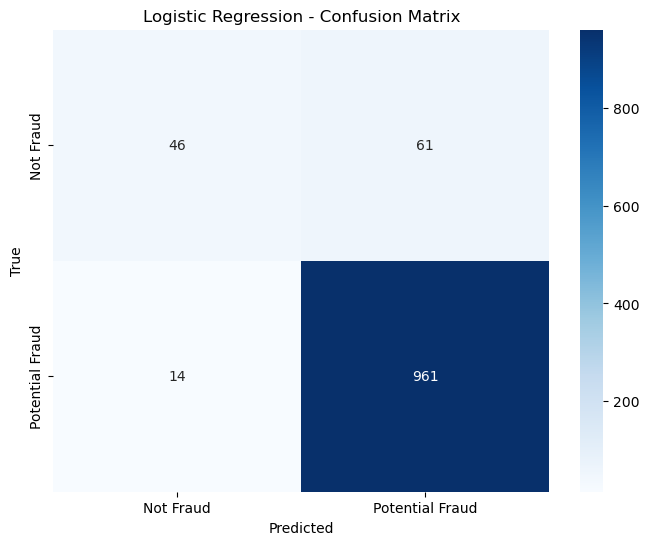

In [42]:
from sklearn.metrics import confusion_matrix

# Fit the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(x_test_scaled)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Potential Fraud'],
            yticklabels=['Not Fraud', 'Potential Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

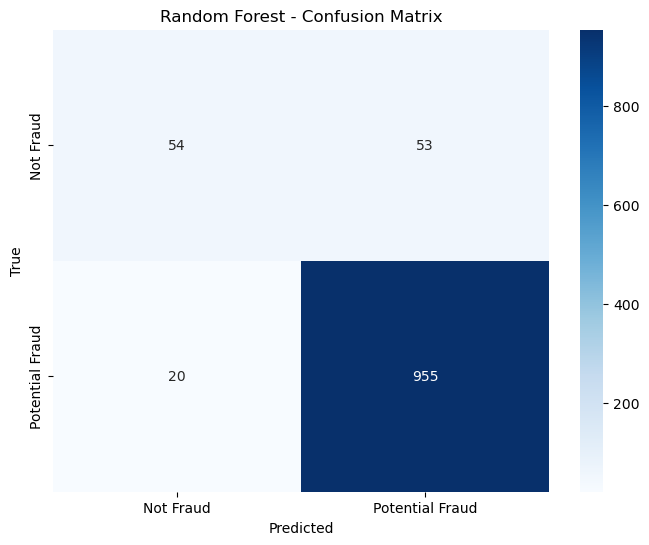

In [43]:
# Fit the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(x_test_scaled)

# Create a confusion matrix for Random Forest
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Potential Fraud'],
            yticklabels=['Not Fraud', 'Potential Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest - Confusion Matrix')
plt.show()

The model seems to catch a lot of the fraudulent cases. The number of normal transactions classified as frauds is really high. Based on business decision ,one can set threshold to create a tradeoff between Fraud and Non Fraud class predictions. Adding More data time to time and training will improve the performance of detection of new fraud patterns and help us to understand Providers fradulent behaviour.


A situation in which fraud detection models exhibit a high test accuracy while still detecting a high number of fraud cases can be explained by the interplay of several factors related to imbalanced datasets

Imbalanced Dataset: In many fraud detection scenarios, the dataset is highly imbalanced, means that non-fraudulent cases significantly outnumber fraudulent cases. 

# <u>**Evaluation**</u>

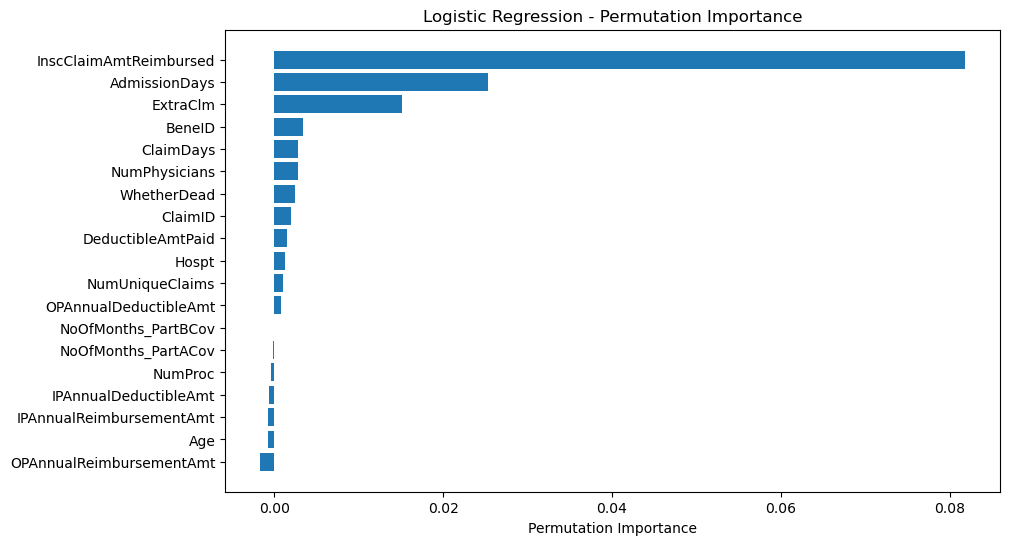

In [44]:
from sklearn.linear_model import LogisticRegression
# Create and fit a linear regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(logistic_regression_model, x_test_scaled, y_test, n_repeats=30, random_state=100)

# Get feature names (assuming you have them in a list)
feature_names = x.columns.tolist()

# Sort feature importance scores and their corresponding feature names
sorted_idx = perm_importance.importances_mean.argsort()

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Logistic Regression - Permutation Importance')

plt.savefig('LR_permutation_importance_plot.jpg')

plt.show()


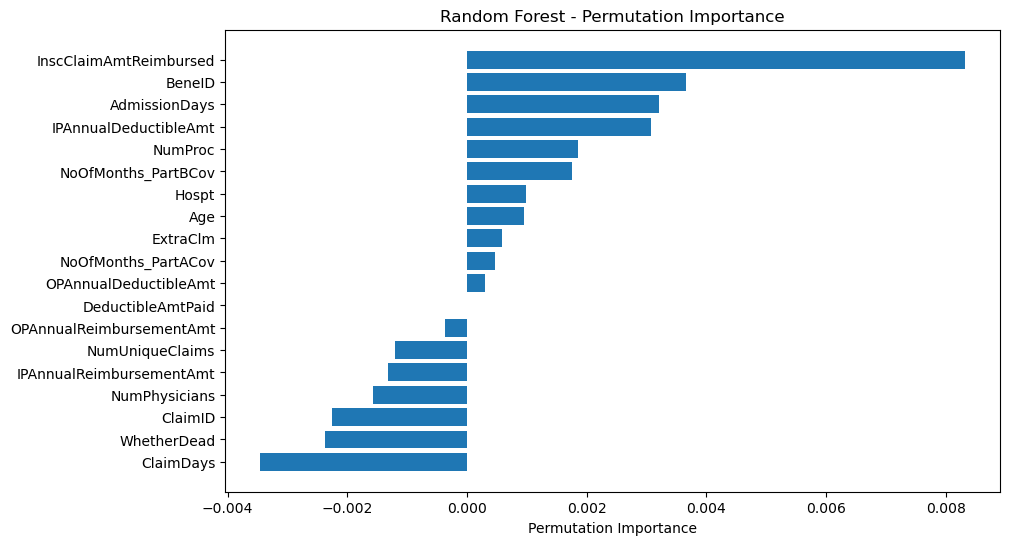

In [45]:
# Create and fit a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_scaled, y_train)

# Calculate permutation importance
perm_importance_rf = permutation_importance(random_forest_model, x_test_scaled, y_test, n_repeats=30, random_state=100)

# Get feature names (assuming you have them in a list)
feature_names = x.columns.tolist()

# Sort feature importance scores and their corresponding feature names
sorted_idx_rf = perm_importance_rf.importances_mean.argsort()

# Create a bar plot to visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_rf)), perm_importance_rf.importances_mean[sorted_idx_rf])
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Permutation Importance')
plt.title('Random Forest - Permutation Importance')
plt.show()


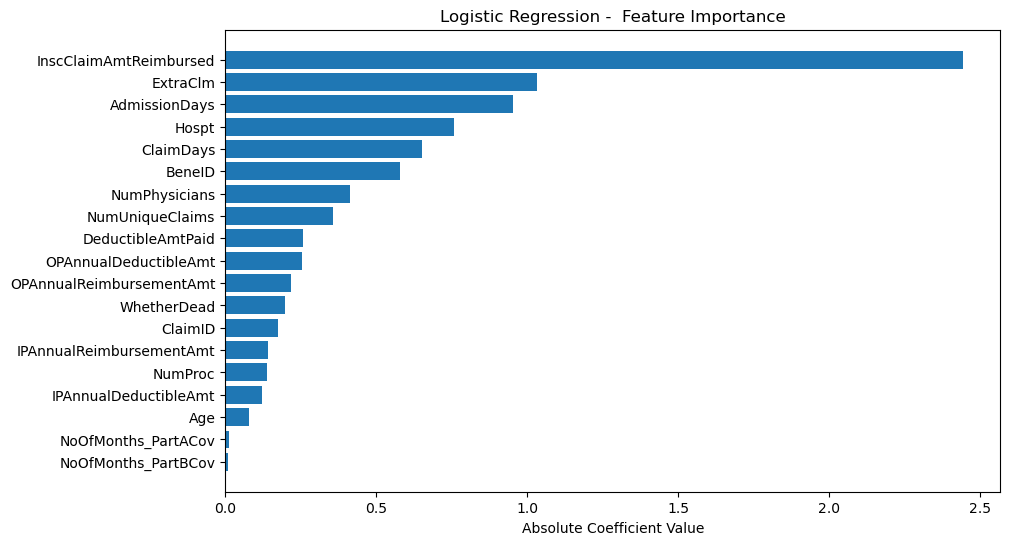

In [46]:
# Create and fit a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_scaled, y_train)

# Get feature coefficients and their corresponding feature names
feature_coefs = logistic_regression_model.coef_[0]
feature_names = x.columns.tolist()

# Sort feature coefficients and their corresponding feature names
sorted_idx_lr = abs(feature_coefs).argsort()

# Create a bar plot to visualize feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_lr)), abs(feature_coefs[sorted_idx_lr]))
plt.yticks(range(len(sorted_idx_lr)), [feature_names[i] for i in sorted_idx_lr])
plt.xlabel('Absolute Coefficient Value')
plt.title('Logistic Regression -  Feature Importance')
plt.show()

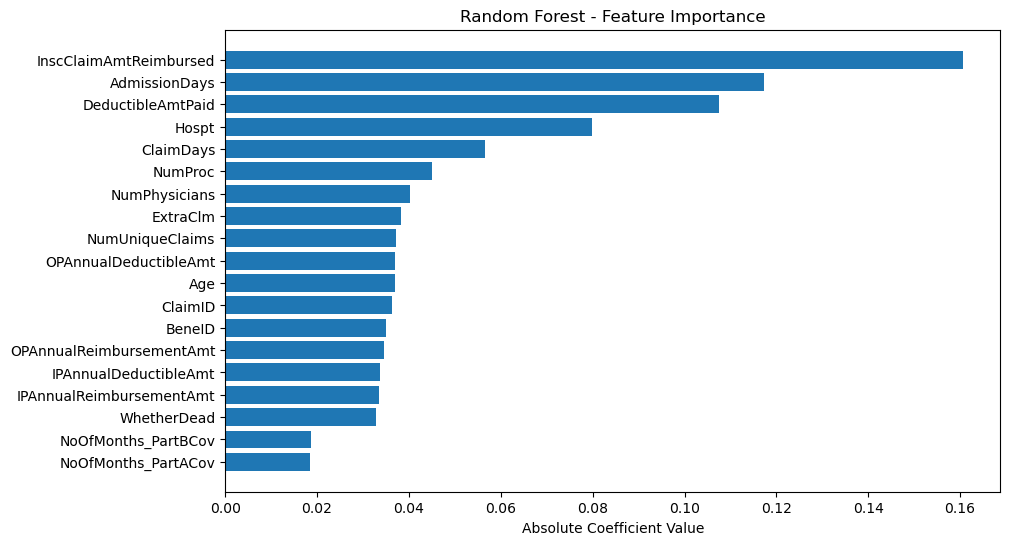

In [47]:
# Create and fit a Random Forest classifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_scaled, y_train)

# Get feature importances and their corresponding feature names
feature_importances = random_forest_model.feature_importances_
feature_names = x.columns.tolist()

# Sort feature importances and their corresponding feature names
sorted_idx_rf = feature_importances.argsort()

# Create a bar plot to visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_rf)), feature_importances[sorted_idx_rf])
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Absolute Coefficient Value')
plt.title('Random Forest - Feature Importance')
plt.show()

In [48]:
data.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'WhetherDead',
       'NumPhysicians', 'NumProc', 'NumUniqueClaims', 'ExtraClm',
       'AdmissionDays', 'ClaimDays', 'Hospt', 'BeneID', 'ClaimID',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'NewPotentialFraud'],
      dtype='object')

In [49]:
#Select highest importance features

X=data[['Age','InscClaimAmtReimbursed','ExtraClm']]
y=data['NewPotentialFraud']
X

,Age,InscClaimAmtReimbursed,ExtraClm
0,78.265753,104640,-61
1,69.590162,605670,18
2,71.790310,52170,-499
3,70.077987,280910,-5181
4,68.840030,33710,-219
...,...,...,...
5405,73.479159,10640,-66
5406,61.019178,4770,-115
5407,71.548045,18470,-383
5408,67.789041,1900,-3


In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [51]:
# Create and fit a Logistic Regression model
lr = LogisticRegression(random_state=100)
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of Logistic Regression Classifier: {accuracy:.2f}%')

Accuracy of Logistic Regression Classifier: 93.44%


In [52]:
# Create and fit a Random Forest classifier model
random_forest_model = RandomForestClassifier(random_state=100)
random_forest_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}%')

Accuracy of Random Forest Classifier: 93.07%


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

# Assuming you have your features (X) and labels (y) ready

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create and fit a Logistic Regression model
lr = LogisticRegression(random_state=100)
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(x_test)

# Create a list of model results
results = []

# Calculate accuracy, precision, recall, F1 score, and ROC-AUC for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Append the results to the list and format numeric values to 4 decimal places
results.append(["Logistic Regression", f"{accuracy_lr:.4f}", f"{precision_lr:.4f}", f"{recall_lr:.4f}", f"{f1_lr:.4f}", f"{roc_auc_lr:.4f}"])

# Create and fit a Random Forest classifier model
random_forest_model = RandomForestClassifier(random_state=100)
random_forest_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(x_test)

# Calculate accuracy, precision, recall, F1 score, and ROC-AUC for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Append the results to the list and format numeric values to 4 decimal places
results.append(["Random Forest", f"{accuracy_rf:.4f}", f"{precision_rf:.4f}", f"{recall_rf:.4f}", f"{f1_rf:.4f}", f"{roc_auc_rf:.4f}"])

# Display the results in a table
table_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
print(tabulate(results, headers=table_headers, tablefmt="pretty"))


+---------------------+----------+-----------+--------+----------+---------+
|        Model        | Accuracy | Precision | Recall | F1 Score | ROC-AUC |
+---------------------+----------+-----------+--------+----------+---------+
| Logistic Regression |  0.9344  |  0.7808   | 0.5089 |  0.6162  | 0.7462  |
|    Random Forest    |  0.9307  |  0.7342   | 0.5179 |  0.6073  | 0.7481  |
+---------------------+----------+-----------+--------+----------+---------+


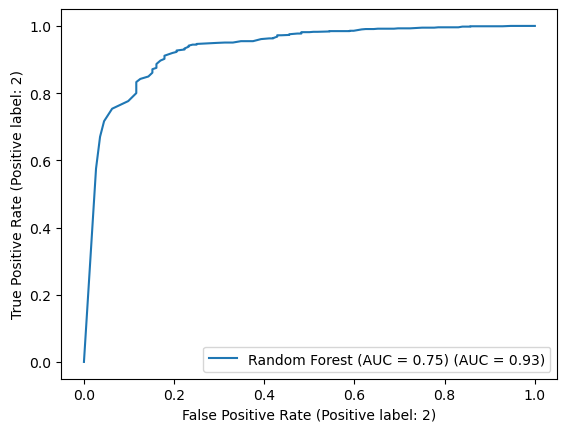

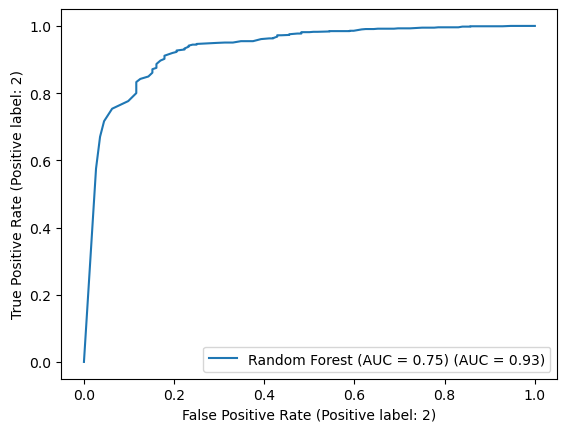

In [81]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_auc_rf_value = roc_auc_score(y_test, y_pred_rf)  # Calculate the ROC-AUC score

# Display the ROC curve for Random Forest
disp = RocCurveDisplay.from_estimator(random_forest_model, x_test, y_test, name=f'Random Forest (AUC = {roc_auc_rf:.2f})')
disp.plot()
plt.show()


Both the logistic regression and random forest models then go through permutation importance and feature importance analysis. From the resulting plots, the top three features were selected, and accuracy was recalculated. As a result, the accuracy for both models increased to 93.44% and 93.07%, respectively.

In imbalanced datasets, accuracy can be misleading because it often leans towards the majority class, where the data is most biased. As a result, accuracy tends to be high, even if the model is not effectively identifying the minority class (the imbalanced or rare class).

ROC(Receiver Operating Characteristics)-AUC(Area Under the Curve) more robust metric in such cases because it focuses on the model's ability to distinguish between the two classes, regardless of their imbalance. A higher AUC indicates that the model is better at separating the classes.


# <u>**Conclusions**</u>

1. Patients for whom high reimbursements were received:
   - Beneficiaries who consistently receive high reimbursements for medical services may draw more attention during fraud detection 

2. Patients who have paid high deductibles: 
   - Patients who pay high deductibles may also be more vulnerable to fraudulent activities. Fraudsters may target individuals with high deductibles, hoping they won't notice unauthorized charges or services. Detecting unusual billing patterns or a sudden increase in services for patients with high deductibles can help identify potential fraud.

The detection of healthcare fraud is of utmost importance due to the rising number of fraud cases in the industry. This issue has prompted the exploration of artificial intelligence as a means to build robust fraud detection systems.

Fraud detection system is contingent on having a substantial database for training the system. However, real-world healthcare data often come with inherent challenges, including missing values, noisy data, and the presence of outliers. These data imperfections can significantly impact the accuracy of the fraud detection system.

To overcome these challenges, a logistic regression-based classifier is proposed. The dataset is preprocessed using two distinct methods: a mean-based method and a clustering-based method. These preprocessing steps are crucial for enhancing data quality and ensuring the classifier's effectiveness.

In the final evaluation, the proposed logistic regression-based classifier is compared to well-known classifiers, including the K-nearest neighbors classifier, Decision Tree, and Random Forest. The results demonstrate that the logistic regression-based classifier consistently outperforms the alternatives, achieving an accuracy rate ranging from 93.07% to 93.44%.

These findings underscore the effectiveness of the logistic regression-based approach in healthcare fraud detection, showcasing its capability to deliver accurate results, even when dealing with real-world data challenges.

# <u>**Recommendations**</u>

**Model Improvement**

1. Adding more fraud data to the training dataset
   -  Increasing the amount of fraud data in training dataset can be beneficial. Machine learning models often perform better when trained on a balanced dataset, where there is a sufficient representation of both fraudulent and non-fraudulent cases. This helps the model learn the nuances of fraud patterns better. 